# King County House Price Prediction Using Regression Algorithms and Deep Learning Algorithm

## IMPORT ESSENTIAL LIBRARIES

In [63]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import missingno as msno 
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import set_config
set_config(display)

import warnings
from joblib import dump, load
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 21)

In [2]:
[file for file in os.listdir('./data')]

['.ipynb_checkpoints',
 'archive.zip',
 'attributesnote.txt',
 'corrnote.txt',
 'kc_house_data.csv']

----------

## EDA

1. **Categorical Features**
    - Categorical: `id`, `waterfront`, `zipcode`.


2. **Numerical Features**
    - Continous: `bathrooms`, `floors`, `lat`, `long`, `price`.
    - Discrete: `date`, `bedrooms`, `sqft_living`, `sqft_lot`, `view`, `condition`, `grade`, `sqft_above`, `sqft_basement`, `yr_built`, `yr_renovated`, `sqft_living15`, `sqft_lot15`.

In [3]:
house_df = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])

In [4]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Brief Data Overview

##### Check Missing Values (NA)

<AxesSubplot:>

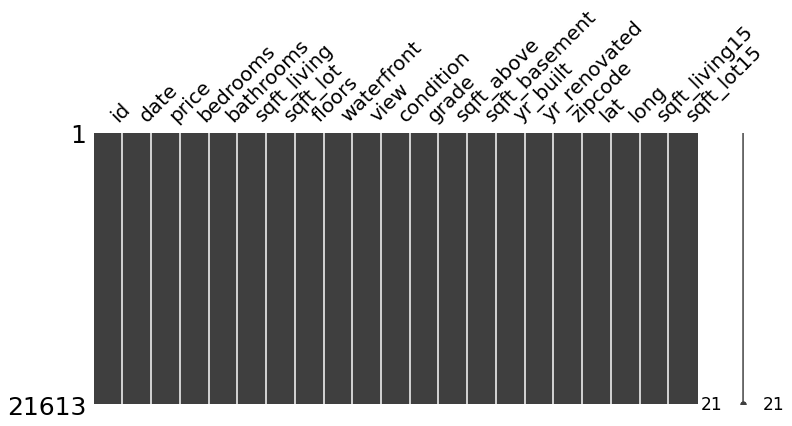

In [5]:
msno.matrix(house_df, fontsize=20, figsize=(12,5))

In [6]:
house_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### Check Unique Values

In [7]:
house_df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [9]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Since ID is unique for every datas, 
# and does not produce any useful meaning, it can be dropped

house_df = house_df.drop('id', axis=1)

#### Plotting Heatmap to Check for Correlations

<AxesSubplot:title={'center':'Pearson Correlation Matrix Heatmap'}>

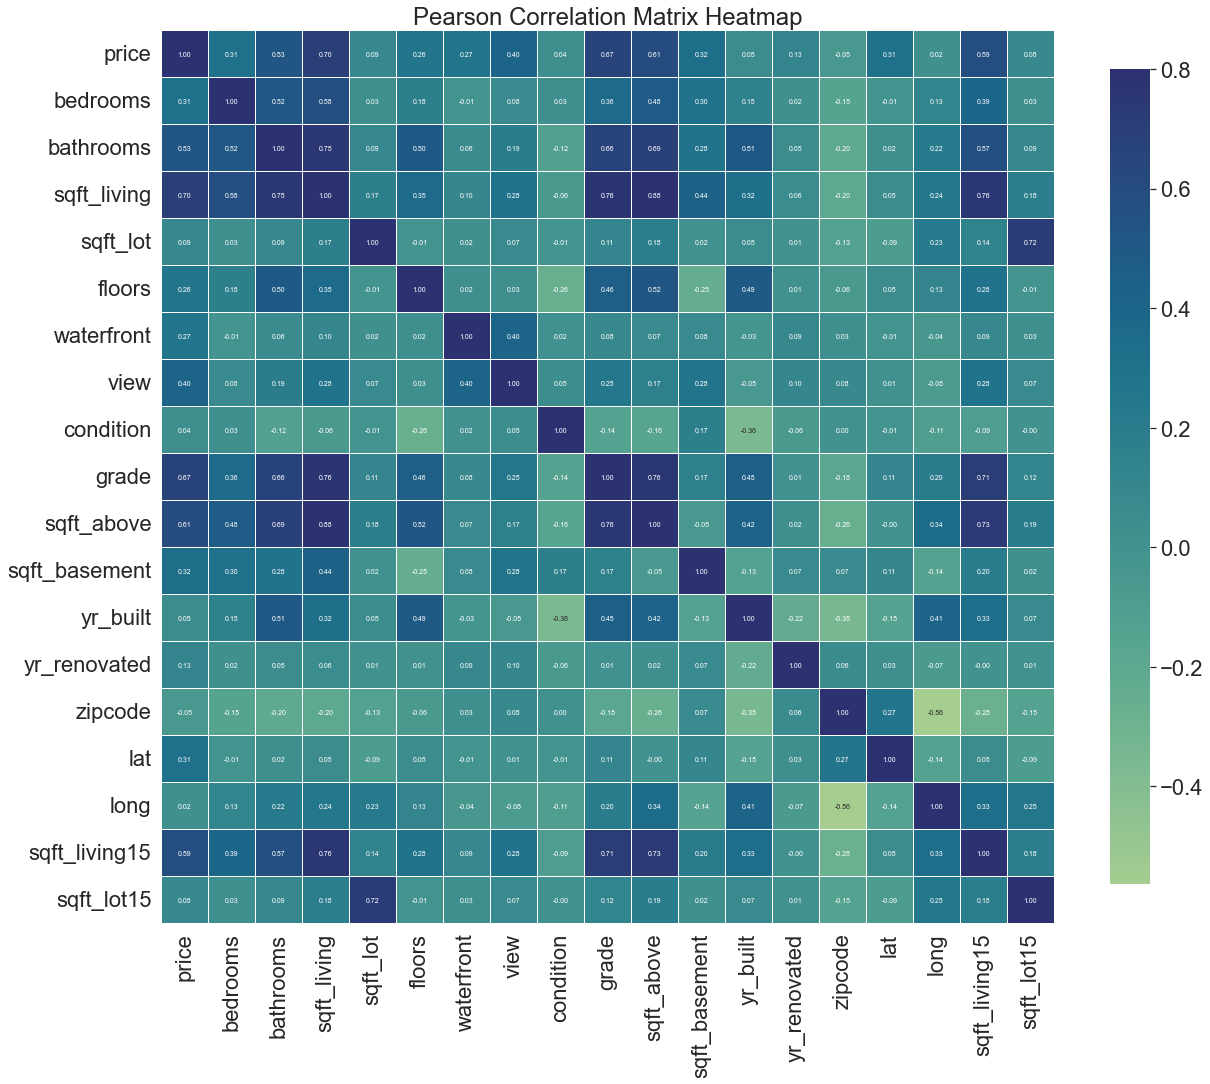

In [11]:
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation Matrix Heatmap',fontsize=24)

correlation = house_df.corr()
sns.heatmap(correlation, vmax=.8, 
            linewidths=.5, square=True, 
            cmap="crest", linecolor='w', 
            annot=True, annot_kws={"size":7}, 
            cbar_kws={"shrink": .75}, fmt=".2f")

#### Checking Each Features

##### `zipcode`

    When considering the surface meaning, it seems that the zipcode alone doesn't provide substantial information regarding house prices, given its correlation of -0.05. However, this perception can be quite deceptive. Holding all other factors constant, zipcodes associated with affluent, prosperous areas tend to indicate properties with higher prices or greater value. King County, for instance, encompasses a total of 70 zipcodes.

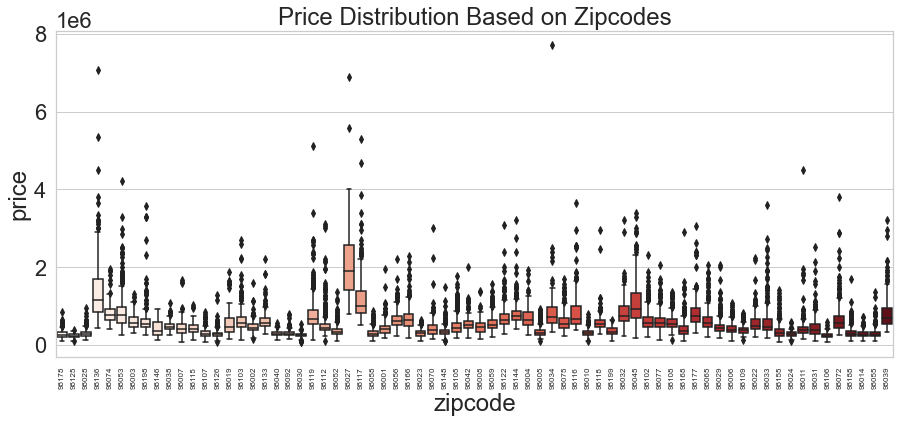

In [12]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x='zipcode',y='price',
            data=house_df, ax=ax, 
            palette='Reds');
ax.set_xticklabels(labels = house_df['zipcode'].unique(), 
                   rotation=90, fontsize=8);
ax.set_title('Price Distribution Based on Zipcodes');

Certain zipcodes has higher prices, because it is a categorical features, we can not see it's correlation directly using numeric calculations.

##### `bedrooms`, `floors`, `bathrooms`

    The graph presented below validates the initial intuition derived from the correlation matrix, indicating that these features generally exhibit a positive correlation with property prices on average.

[Text(0.5, 0, 'Floors'), Text(0, 0.5, 'Price')]

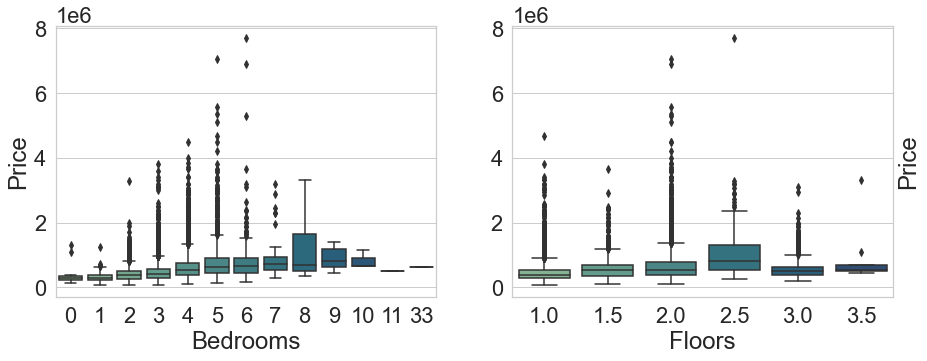

In [13]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df['bedrooms'],y=house_df['price'], 
            ax=axes[0], palette = 'crest')
sns.boxplot(x=house_df['floors'],y=house_df['price'], 
            ax=axes[1], palette = 'crest')

axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[1].yaxis.set_label_position("right")
axes[1].set(xlabel='Floors', ylabel='Price')

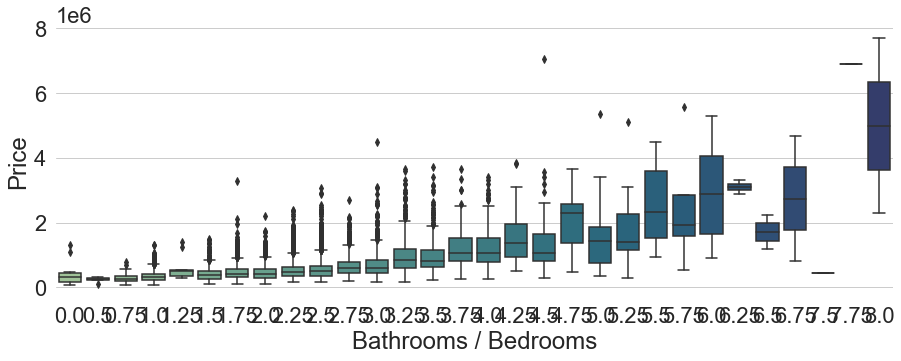

In [14]:
f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=house_df['bathrooms'],y=house_df['price'], 
            ax=axe, palette = 'crest')
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

##### `waterfront`, `view`, `grade`

    
    Similar observations can be made regarding these three features. Specifically, the "waterfront" location appears to significantly enhance the property price, as does the presence of a desirable view and a higher grade reflecting better quality. It is worth noting that in this case, there is no need to create dummy variables for "view" and "grade" since higher values in these features correspond to superior property qualities.

[Text(0.5, 0, 'View'), Text(0, 0.5, 'Price')]

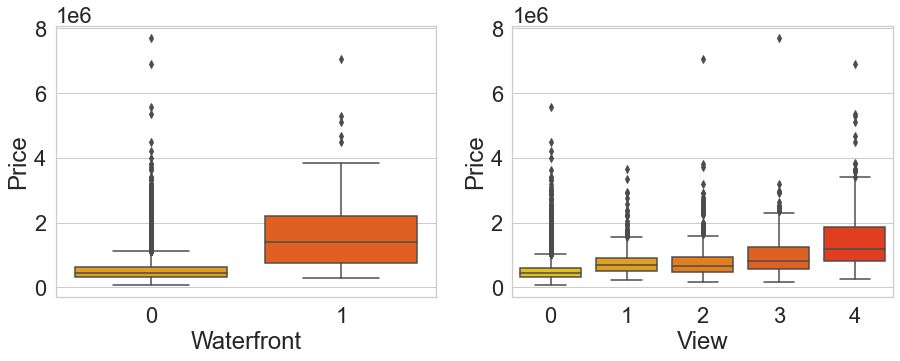

In [15]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house_df['waterfront'],y=house_df['price'], 
            ax=axes[0], palette = 'autumn_r')
sns.boxplot(x=house_df['view'],y=house_df['price'], 
            ax=axes[1], palette = 'autumn_r')

axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[1].set(xlabel='View', ylabel='Price')

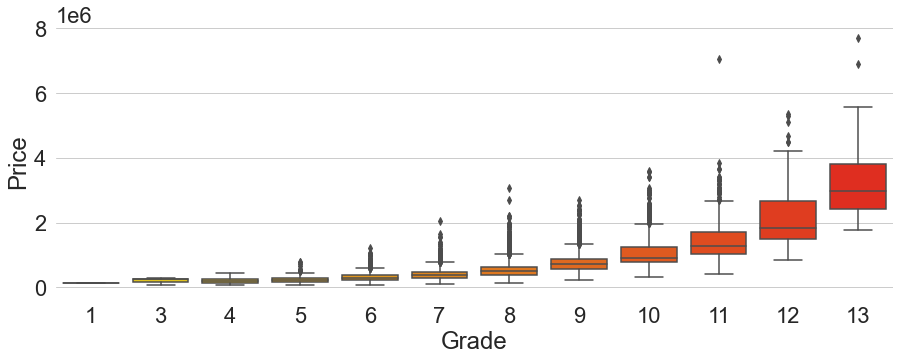

In [16]:
f, axe = plt.subplots(figsize=(15,5))
sns.boxplot(x=house_df['grade'],y=house_df['price'], ax=axe, palette = 'autumn_r')
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price');

##### `age` & `age_renov` + Feature Extraction

    
    Binning has been implemented on the features yr_built and yr_renovated to mitigate potential errors. This process involves calculating the ages of the houses and renovation ages relative to the date the property is sold. Consequently, the original feature is discarded. The distributions of these modified features are displayed in the graphs below:

In [17]:
house_df['sales_year'] = pd.DatetimeIndex(house_df['date']).year
house_df['sales_month'] = pd.DatetimeIndex(house_df['date']).month

# Feature Extraction
house_df['age'] = house_df['sales_year'] - house_df['yr_built']

house_df['age_renov']=0
house_df['age_renov'] = house_df['sales_year'][house_df['yr_renovated'] != 0].astype(int) - house_df['yr_renovated'][house_df['yr_renovated'] != 0]
house_df['age_renov'][house_df['age_renov'].isna()] = house_df['age']

# age Binning
bins_age = [-2,1,5,10,20,30,60,100,100000]
labels = [0,5,10,20,30,60,80,100]
house_df['age_binned'] = pd.cut(house_df['age'], 
                                bins=bins_age, 
                                labels=labels)
# age_renov Binning
bins_renov = [-2,1,5,10,20,30,50,100000]
labels = [0,5,10,20,30,60,100]
house_df['age_renov_binned'] = pd.cut(house_df['age_renov'], 
                                   bins=bins_renov,
                                   labels=labels)

Text(0.5, 1.0, 'Years Since Renovated')

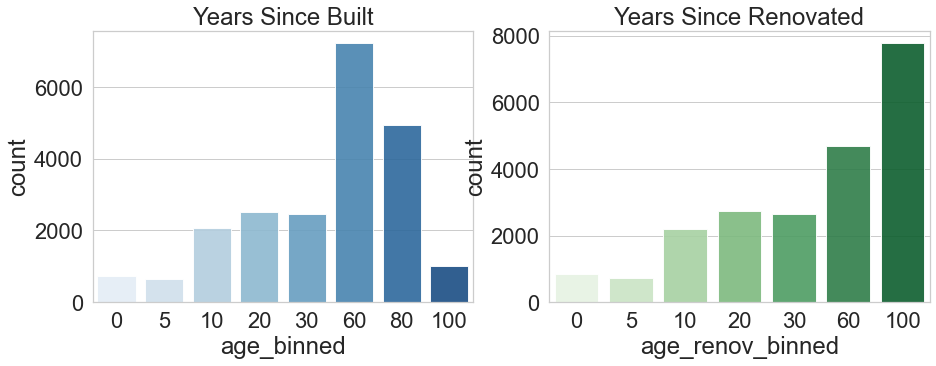

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(house_df['age_binned'], palette='Blues', 
              alpha=0.9, ax=axes[0])
sns.countplot(house_df['age_renov_binned'], palette='Greens', 
              alpha=0.9, ax=axes[1])

axes[0].set_title('Years Since Built')
axes[1].set_title('Years Since Renovated')

Text(0.5, 1.0, 'Price Evolution Over Time')

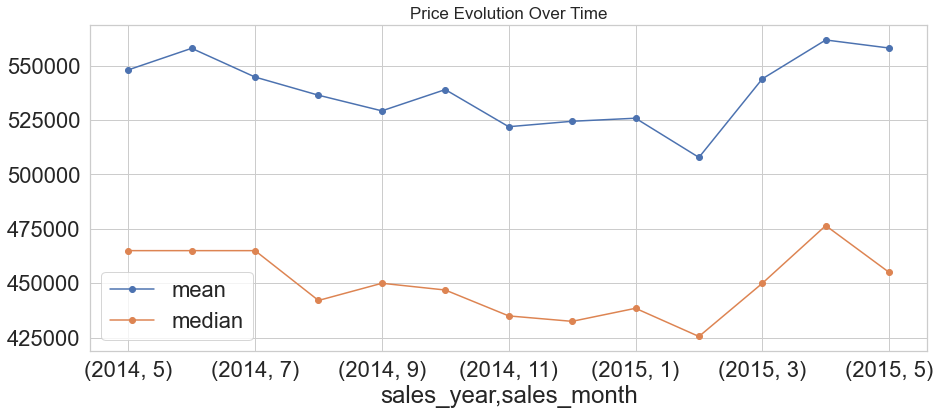

In [19]:
house_df.groupby(['sales_year', 'sales_month'])['price'].agg(['mean', 'median']).plot(figsize=(15,6), 
                                                                                  marker='.', 
                                                                                  markersize=12)
plt.title('Price Evolution Over Time', fontsize=17)

##### Drop features that are used for extraction

In [20]:
house_df.drop(['date'], axis=1, inplace=True)
house_df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

house_df_new = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 
                        'sqft_lot', 'floors', 'waterfront', 
                        'view', 'condition', 'grade', 
                        'sqft_above', 'sqft_basement', 'zipcode', 
                        'lat', 'long', 'sqft_living15', 'sqft_lot15', 
                        'sales_year', 'sales_month', 'age_binned', 
                         'age_renov_binned']]

##### Feature Normalization

###### Applying log to `price`, then to `sqft_living`, `sqft_living15`, `sqft_lot`, `sqft_lot15`, `sqft_basement`

Text(0.5, 1.0, '"price" Distribution After Log')

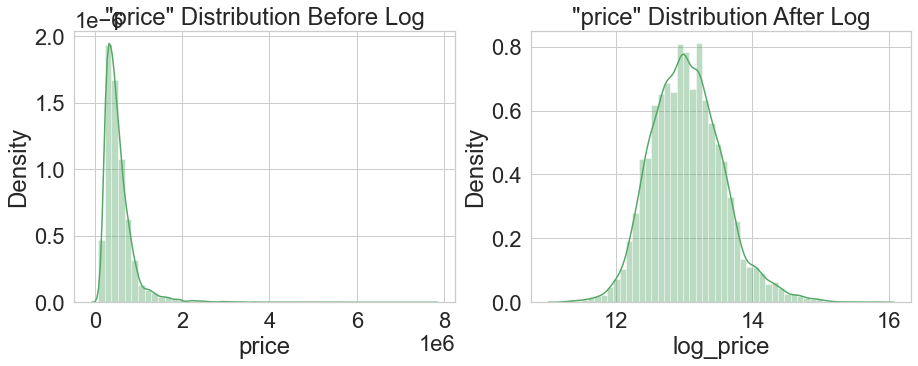

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(house_df_new['price'], color='g', ax=axes[0])

house_df_new['log_price'] = np.log(house_df_new['price'])
sns.distplot(house_df_new['log_price'], color='g', ax=axes[1])

axes[0].set_title('"price" Distribution Before Log')
axes[1].set_title('"price" Distribution After Log')

In [28]:
house_df_new.drop('price', axis=1, inplace=True)

In [31]:
columns_to_log = ['sqft_living', 'sqft_living15', 'sqft_lot', 
          'sqft_lot15', 'sqft_basement']
house_df_new[columns_to_log].describe()

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_basement
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,2079.899736,1986.552492,1.510697e+04,12768.455652,291.509045
std,918.440897,685.391304,4.142051e+04,27304.179631,442.575043
min,290.000000,399.000000,5.200000e+02,651.000000,0.000000
25%,1427.000000,1490.000000,5.040000e+03,5100.000000,0.000000
50%,1910.000000,1840.000000,7.618000e+03,7620.000000,0.000000
75%,2550.000000,2360.000000,1.068800e+04,10083.000000,560.000000
max,13540.000000,6210.000000,1.651359e+06,871200.000000,4820.000000


As you can see, the minimum value in `sqft_basement` is 0, log can not be applied to the value of 0, so those rows will be added by 1 to solve that.

In [32]:
#.loc[row, column]
house_df_new.loc[:, 'sqft_living_log'] = np.log(house_df_new.loc[:, 'sqft_living'])
house_df_new.loc[:, 'sqft_living15_log'] = np.log(house_df_new.loc[:, 'sqft_living15'])
house_df_new.loc[:, 'sqft_lot_log'] = np.log(house_df_new.loc[:, 'sqft_lot'])
house_df_new.loc[:, 'sqft_lot15_log'] = np.log(house_df_new.loc[:, 'sqft_lot15'])
house_df_new.loc[:, 'sqft_basement_log'] = np.log(house_df_new.loc[:, 'sqft_basement']+1)


In [33]:
house_df_new.drop(columns_to_log, axis=1, inplace=True)

## Preprocessing Data 

In [37]:
house_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   bedrooms           21613 non-null  int64   
 1   bathrooms          21613 non-null  float64 
 2   floors             21613 non-null  float64 
 3   waterfront         21613 non-null  int64   
 4   view               21613 non-null  int64   
 5   condition          21613 non-null  int64   
 6   grade              21613 non-null  int64   
 7   sqft_above         21613 non-null  int64   
 8   zipcode            21613 non-null  int64   
 9   lat                21613 non-null  float64 
 10  long               21613 non-null  float64 
 11  sales_year         21613 non-null  int64   
 12  sales_month        21613 non-null  int64   
 13  age_binned         21613 non-null  category
 14  age_renov_binned   21613 non-null  category
 15  log_price          21613 non-null  float64 
 16  sqft

Since `age_binned` & `age_renov_binned` is still category, we need to change it to int64 

In [38]:
house_df_new['age_binned'] = house_df_new['age_binned'].astype('int64')
house_df_new['age_renov_binned'] = house_df_new['age_renov_binned'].astype('int64')

In order to preprocess and encode properly, we need to split the dataset into categorical and numerical.

In [39]:
numerical = house_df_new.drop(['zipcode', 'log_price'], axis=1).columns
categorical = ['zipcode']

Separating dataset into Training Set, Validation Set, and Test Set

In [43]:
X = house_df_new.drop(['log_price'], axis=1)
y = house_df_new['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=.15, 
                                                   random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                     test_size=.18, 
                                                     random_state=42)

print(f'Train Data Shape: {X_train.shape}')
print(f'Valid Data Shape: {X_valid.shape}')
print(f'Test Data Shape: {X_test.shape}')

Train Data Shape: (17722, 20)
Valid Data Shape: (3891, 20)
Test Data Shape: (3242, 20)


To revert the logged `price` to their original values, we can apply *np.exp()* 

In [44]:
y_train_exp = np.exp(y_train)
y_valid_exp = np.exp(y_valid)
y_test_exp = np.exp(y_test)

Creating preprocessing pipeline using ColumnTransformer

In [46]:
scaler = MinMaxScaler()
onehot = OneHotEncoder(handle_unknown='error', drop='first', sparse=False)

preprocessor = ColumnTransformer(transformers=[
    ('num', scaler, numerical),
    ('cat', onehot, categorical)
],remainder='drop')

## Modelling

Commonly used regression algorithms as well as deep learning algorithm will be used: 
- Random Forest Regression
- ExtraTreesRegressor
- XGBRegressor

### RandomForestRegression

In [55]:
randomforest_reg = RandomForestRegressor(n_jobs=-1, random_state=42, criterion='squared_error')

randomforest_params = {'max_depth':[15, 20,22,25],
             'max_features':[18, 26, 30, 34], 
             'n_estimators':[400,500,700,800]}

randomforest_gs = GridSearchCV(estimator=randomforest_reg, 
                            param_grid=randomforest_params,
                            cv=2,
                            return_train_score=True)

Pipeline for RandomForestRegression

In [56]:
randomforest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('grid', randomforest_gs)
])

Finding the best parameters

In [57]:
randomforest_model = randomforest_pipeline.fit(X_train, y_train)
randomforest_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'lat', 'long', 'sales_year', 'sales_month',
       'age_binned', 'age_renov_binned', 'sqft_living_log',
       'sqft_living15_log', 'sqft_lot_log', 'sqft_lot15_log',
       'sqft_basement_log'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['zipcode'])])),
                ('grid',
                 GridSearchCV(cv=2,
                              estimator=RandomForestRegressor(n_jobs=-1,
                                                              random_state=42),
                              param_grid={'max_depth': [15, 20, 22, 25],
                                          'max_features': [18, 26, 30, 34],
                                          'n_estimators': [400, 500, 700, 800]},
                              return_train_score=True))])

In [58]:
randomforest_model['grid'].best_estimator_

RandomForestRegressor(max_depth=20, max_features=34, n_estimators=800,
                      n_jobs=-1, random_state=42)

In [59]:
randomforest_model['grid'].best_params_

{'max_depth': 20, 'max_features': 34, 'n_estimators': 800}

{'max_depth': 20, 'max_features': 34, 'n_estimators': 800}

In [108]:
max_depth = 20
n_estimators = 800
max_features = 34

Fit the model with the best Hyperparameters found in GridSearch

In [109]:
randomforest_model_1 = RandomForestRegressor(n_estimators=n_estimators, 
                              max_depth=max_depth, 
                              max_features=max_features, 
                              n_jobs=-1, 
                              random_state=42, 
                              criterion='squared_error')

randomforest_pipeline_updated = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', randomforest_model_1)
])

print(cross_val_score(randomforest_pipeline_updated, X_train, y_train, cv=5))

randomforest_best_model = randomforest_pipeline_updated.fit(X_train, y_train)

[0.8909603  0.89012394 0.88871486 0.89549667 0.88889661]


Test the model on Validation set

In [110]:
print(f'Score on Training Set: {randomforest_best_model.score(X_train, y_train)}')
print(f'Score on Valid Set: {randomforest_best_model.score(X_valid, y_valid)}')

Score on Training Set: 0.9817706990998967
Score on Valid Set: 0.8934523502246101


In [111]:
y_train_pred = randomforest_best_model.predict(X_train)
y_valid_pred = randomforest_best_model.predict(X_valid)

y_train_pred_exp = np.exp(y_train_pred)
y_valid_pred_exp = np.exp(y_valid_pred)

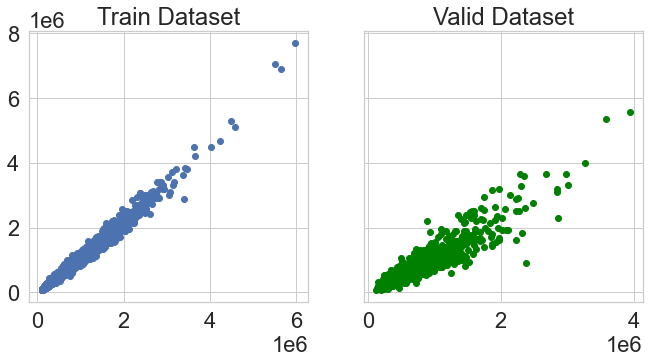

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True)

ax[0].scatter(y_train_pred_exp, y_train_exp)
ax[1].scatter(y_valid_pred_exp, y_valid_exp, color='green')
ax[0].set_title('Train Dataset')
ax[1].set_title('Valid Dataset');

In order to compare the models result later, create a dataframe of the results

In [113]:
index=['RandomForest', 'ExtraTree', 'XGBRegressor']
col = ['R2 Train', 'RMSE Train', 'R2 Valid', 'RMSE Valid']

result_df_exp = pd.DataFrame(index=index, columns=col)

In [114]:
mse_train_rf = mean_squared_error(y_train_exp, y_train_pred_exp, squared=False)
mse_valid_rf = mean_squared_error(y_valid_exp, y_valid_pred_exp, squared=False)

r2_train_rf = r2_score(y_train_exp, y_train_pred_exp)
r2_valid_rf = r2_score(y_valid_exp, y_valid_pred_exp)

result_df_exp.loc['RandomForest','R2 Train'] = r2_train_rf
result_df_exp.loc['RandomForest','R2 Valid'] = r2_valid_rf
result_df_exp.loc['RandomForest','RMSE Train'] = mse_train_rf
result_df_exp.loc['RandomForest','RMSE Valid'] = mse_valid_rf

In [115]:
result_df_exp

,R2 Train,RMSE Train,R2 Valid,RMSE Valid
RandomForest,0.976692,55398.356192,0.869397,139426.259766
ExtraTree,NaN,NaN,NaN,NaN
XGBRegressor,NaN,NaN,NaN,NaN


Using the same method, let's try Extra Trees and XGB

### Extra Trees Regressor

In [83]:
extratree_reg = ExtraTreesRegressor(n_jobs=-1, random_state=42, criterion='squared_error')
extratree_params = {
    'max_depth':[17, 20, 22, 25],
    'max_features':[20, 22, 25, 30, 35],
    'n_estimators':[400, 500, 700, 900]
}
extratree_gridsearch = GridSearchCV(estimator=extratree_reg, 
                            param_grid=extratree_params,
                            cv=2,
                            return_train_score=True)

In [84]:
extratree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', extratree_gridsearch)
])

In [85]:
extratree_model = extratree_pipeline.fit(X_train, y_train)
extratree_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'lat', 'long', 'sales_year', 'sales_month',
       'age_binned', 'age_renov_binned', 'sqft_living_log',
       'sqft_living15_log', 'sqft_lot_log', 'sqft_lot15_log',
       'sqft_basement_log'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['zipcode'])])),
                ('model',
                 GridSearchCV(cv=2,
                              estimator=ExtraTreesRegressor(n_jobs=-1,
                                                            random_state=42),
                              param_grid={'max_depth': [17, 20, 22, 25],
                                          'max_features': [20, 22, 25, 30, 35],
                                          'n_estimators': [400, 500, 700, 900]},
                              return_train_score=True))])

In [86]:
extratree_model['model'].best_params_

{'max_depth': 25, 'max_features': 35, 'n_estimators': 900}

In [116]:
max_depth = 25 
n_estimators = 900 
max_features = 35 

In [117]:
extratree_model_1 = ExtraTreesRegressor(n_estimators=n_estimators,
                            max_depth=max_depth,
                            max_features=max_features,
                            random_state=42,
                            n_jobs=-1,
                            criterion='squared_error')

extratree_pipeline_updated = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', extratree_model_1)
])

print(cross_val_score(extratree_pipeline_updated, X_train, y_train, cv=5))

extratree_best_model = extratree_pipeline_updated.fit(X_train, y_train)

[0.89339208 0.89502242 0.89238715 0.89913953 0.89118171]


In [118]:
y_train_pred = extratree_best_model.predict(X_train)
y_valid_pred = extratree_best_model.predict(X_valid)

y_train_pred_exp = np.exp(y_train_pred)
y_valid_pred_exp = np.exp(y_valid_pred)

Text(0.5, 0.98, 'Extra Trees Regressor')

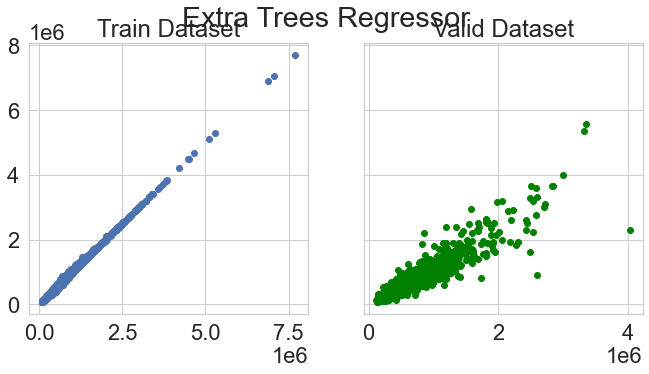

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True)

ax[0].scatter(y_train_pred_exp, y_train_exp)
ax[1].scatter(y_valid_pred_exp, y_valid_exp, color='green')
ax[0].set_title('Train Dataset')
ax[1].set_title('Valid Dataset')
plt.suptitle("Extra Trees Regressor")

In [120]:
mse_train_et = mean_squared_error(y_train_exp, y_train_pred_exp, squared=False)
mse_valid_et = mean_squared_error(y_valid_exp, y_valid_pred_exp, squared=False)

r2_train_et = r2_score(y_train_exp, y_train_pred_exp)
r2_valid_et = r2_score(y_valid_exp, y_valid_pred_exp)

result_df_exp.loc['ExtraTree','R2 Train'] = r2_train_et
result_df_exp.loc['ExtraTree','R2 Valid'] = r2_valid_et
result_df_exp.loc['ExtraTree','RMSE Train'] = mse_train_et
result_df_exp.loc['ExtraTree','RMSE Valid'] = mse_valid_et

In [121]:
result_df_exp

,R2 Train,RMSE Train,R2 Valid,RMSE Valid
RandomForest,0.976692,55398.356192,0.869397,139426.259766
ExtraTree,0.997528,18039.949383,0.862324,143152.000414
XGBRegressor,NaN,NaN,NaN,NaN


### XGBRegressor

In [122]:
xgb_model = XGBRegressor(nthread=4, subsample=0.9, colsample_bytree=0.7,
                    min_child_weight=4, silent=1, objective='reg:squarederror', verbosity=0)

xgb_params = {
    'learning_rate':[0.01, 0.03, 0.05, 0.1],
    'max_depth':[7, 8, 9, 10],
    'n_estimators':[200, 300, 500, 700, 900]
}

xgb_gs = GridSearchCV(estimator=xgb_model,
                             param_grid=xgb_params,
                             cv=2,
                             return_train_score=True)

In [124]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_gs)
])

In [125]:
xgb_best_model = xgb_pipeline.fit(X_train, y_train)
xgb_best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'lat', 'long', 'sales_year', 'sales_month',
       'age_binned', 'age_renov_binned', 'sqft_living_log',
       'sqft_living15_log', 'sqft_lot_log', 'sqft_lot15_log',
       'sqft_basement_log'],
      dtype='ob...
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=4,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None, nthread=4,
                                                     num_parallel_tree=None,
                                                     predictor=None, ...),
                              param_grid={'learning_rate': [0.01, 0.03, 0.05,
                                                            0.1],
                                          'max_depth': [7, 8, 9, 10],
                                          'n_estimators': [200, 300, 500, 700,
                                                           900]},
                              return_train_score=True))])

In [126]:
xgb_best_model['model'].best_params_

{'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 900}

In [127]:
learn_rate = 0.03 
n_estimators = 900 
max_depth = 7 

In [128]:
xgb_model_1 = XGBRegressor(learning_rate=learn_rate,
                       n_estimators=n_estimators,
                       max_depth=max_depth,
                       nthread=4,
                       subsample=0.9,
                       colsample_bytree=0.7,
                       min_child_weight=4,
                       objective='reg:squarederror')

xgb_pipeline_updated = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model_1)
])

print(cross_val_score(xgb_pipeline_updated,X_train, y_train,cv=5))

xgb_model_best = xgb_pipeline_updated.fit(X_train, y_train)
xgb_model_best

[0.91044937 0.90846059 0.9068191  0.91673829 0.90924986]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'lat', 'long', 'sales_year', 'sales_month',
       'age_binned', 'age_renov_binned', 'sqft_living_log',
       'sqft_living15_log', 'sqft_lot_log', 'sqft_lot15_log',
       'sqft_basement_log'],
      dtype='ob...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.03,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None, min_child_weight=4,
                              missing=nan, monotone_constraints=None,
                              n_estimators=900, n_jobs=None, nthread=4,
                              num_parallel_tree=None, predictor=None, ...))])

In [129]:
y_train_pred = xgb_model_best.predict(X_train)
y_valid_pred = xgb_model_best.predict(X_valid)

y_train_pred_exp = np.exp(y_train_pred)
y_valid_pred_exp = np.exp(y_valid_pred)

Text(0.5, 0.98, 'XGB Regressor')

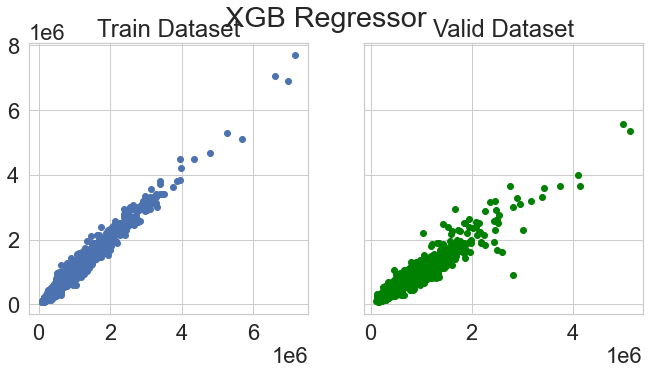

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True)

ax[0].scatter(y_train_pred_exp, y_train_exp)
ax[1].scatter(y_valid_pred_exp, y_valid_exp, color='green')
ax[0].set_title('Train Dataset')
ax[1].set_title('Valid Dataset')
plt.suptitle("XGB Regressor")

In [131]:
mse_train_xgb = mean_squared_error(y_train_exp, y_train_pred_exp, squared=False)
mse_valid_xgb = mean_squared_error(y_valid_exp, y_valid_pred_exp, squared=False)

r2_train_xgb = r2_score(y_train_exp, y_train_pred_exp)
r2_valid_xgb = r2_score(y_valid_exp, y_valid_pred_exp)

result_df_exp.loc['XGBRegressor','R2 Train'] = r2_train_xgb
result_df_exp.loc['XGBRegressor','R2 Valid'] = r2_valid_xgb
result_df_exp.loc['XGBRegressor','RMSE Train'] = mse_train_xgb
result_df_exp.loc['XGBRegressor','RMSE Valid'] = mse_valid_xgb

### Result & Discussion

In [132]:
result_df_exp

,R2 Train,RMSE Train,R2 Valid,RMSE Valid
RandomForest,0.976692,55398.356192,0.869397,139426.259766
ExtraTree,0.997528,18039.949383,0.862324,143152.000414
XGBRegressor,0.97358,58980.854548,0.91905,109768.396817


Upon comparing the outcomes, it becomes evident that while Extra Tree exhibited the highest R2 and RMSE on the Train Set, it is XGB that performs the most effectively on the validation set, indicating its ability to predict new data is better. In conclusion, we conclude that the **XGB Regressor is the optimal model** for this specific problem.

### Applying on Test Set

In [135]:
y_test_pred = xgb_model_best.predict(X_test)
y_test_pred_exp = np.exp(y_test_pred)

r2_test_xgb = r2_score(y_test_pred_exp, y_test_exp)
mse_test_xgb = mean_squared_error(y_test_pred_exp, y_test_exp, squared=False)

print(f'MSE Score on Test set: {mse_test_xgb}')
print(f'R2 Score on Test set: {r2_test_xgb}')

MSE Score on Test set: 110439.91899894607
R2 Score on Test set: 0.9091121108563087


In the test set, XGBRegressor is able to predict with the R2 of 0.90 and RMSE of 110439.